In [1]:
classes_names = ['person']

In [2]:
!cd coco/PythonAPI && make && make install && python3 setup.py install && cd - 

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/pycocotools/_mask.cpython-36m-x86_64-linux-gnu.so -> pycocotools
rm -rf build
# install pycocotools to the Python site-packages
python setup.py build_ext install
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -m64 -fPIC -m64 -fPIC -fPIC -I/opt/conda/lib/python3.6/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisle

removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing pycocotools-2.0-py3.6-linux-x86_64.egg
removing '/opt/conda/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg' (and everything under it)
creating /opt/conda/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg
Extracting pycocotools-2.0-py3.6-linux-x86_64.egg to /opt/conda/lib/python3.6/site-packages
pycocotools 2.0 is already the active version in easy-install.pth

Installed /opt/conda/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg
Processing dependencies for pycocotools==2.0
Searching for matplotlib==2.2.3
Best match: matplotlib 2.2.3
Adding matplotlib 2.2.3 to easy-install.pth file

Using /opt/conda/lib/python3.6/site-packages
Searching for Cython==0.28.5
Best match: Cython 0.28.5
Adding Cython 0.28.5 to easy-install.pth file
Installing cygdb script to /opt/conda/bin
Installing cython script to /opt/conda/bin
Installing cythonize script to /opt/conda/bin

U

gcc -pthread -shared -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib,--no-as-needed -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib,--no-as-needed build/temp.linux-x86_64-3.6/../common/maskApi.o build/temp.linux-x86_64-3.6/pycocotools/_mask.o -L/opt/conda/lib -lpython3.6m -o build/lib.linux-x86_64-3.6/pycocotools/_mask.cpython-36m-x86_64-linux-gnu.so
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/coco.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/_mask.cpython-36m-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/__init__.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/cocoeval.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/mask.py -> build/bdist.linux-x86_64/egg/pycocotools
by

In [3]:
!python3 -m pip install pip --upgrade
!python3 -m pip install tqdm
!python3 -m pip install opencv-python
!python3 -m pip install scikit-image

In [4]:
!apt-get update && apt-get install -y libgl1-mesa-glx 

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,182 kB]
Fetched 2,434 kB in 3s (878 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (20.0.8-0ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 221 not upgraded.


In [5]:
!apt-get install -y libglib2.0-0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libglib2.0-0 is already the newest version (2.56.4-0ubuntu0.18.04.8).
0 upgraded, 0 newly installed, 0 to remove and 221 not upgraded.


In [3]:

from pycocotools.coco import COCO
import os
import shutil
from tqdm import tqdm
import skimage.io as io
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw
 
#the path you want to save your results for coco to voc
savepath="/dataset/COCO/result/"
img_dir=savepath+'images/'
anno_dir=savepath+'Annotations/'
# datasets_list=['train2014', 'val2014']
datasets_list=['train2017']
 
classes_names = ['person']
#Store annotations and train2014/val2014/... in this folder
dataDir= '/dataset/COCO/'
 
headstr = """\
<annotation>
    <folder>VOC</folder>
    <filename>%s</filename>
    <source>
        <database>My Database</database>
        <annotation>COCO</annotation>
        <image>flickr</image>
        <flickrid>NULL</flickrid>
    </source>
    <owner>
        <flickrid>NULL</flickrid>
        <name>company</name>
    </owner>
    <size>
        <width>%d</width>
        <height>%d</height>
        <depth>%d</depth>
    </size>
    <segmented>0</segmented>
"""
objstr = """\
    <object>
        <name>%s</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>%d</xmin>
            <ymin>%d</ymin>
            <xmax>%d</xmax>
            <ymax>%d</ymax>
        </bndbox>
    </object>
"""
 
tailstr = '''\
</annotation>
'''


In [29]:

#if the dir is not exists,make it,else delete it
def mkr(path):
    if os.path.exists(path):
        shutil.rmtree(path)
        os.mkdir(path)
    else:
        os.mkdir(path)
mkr(img_dir)
mkr(anno_dir)
def id2name(coco):
    classes=dict()
    for cls in coco.dataset['categories']:
        classes[cls['id']]=cls['name']
    return classes
 
def write_xml(anno_path,head, objs, tail):
    f = open(anno_path, "w")
    f.write(head)
    for obj in objs:
        f.write(objstr%(obj[0],obj[1],obj[2],obj[3],obj[4]))
    f.write(tail)
 
 
def save_annotations_and_imgs(coco,dataset,filename,objs):
    #eg:COCO_train2014_000000196610.jpg-->COCO_train2014_000000196610.xml
    anno_path=anno_dir+filename[:-3]+'xml'
    img_path=dataDir+dataset+'/'+filename
#     print(img_path)
    dst_imgpath=img_dir+filename
 
    img=cv2.imread(img_path)
    if (img.shape[2] == 1):
        print(filename + " not a RGB image")
        return
    shutil.copy(img_path, dst_imgpath)
 
    head=headstr % (filename, img.shape[1], img.shape[0], img.shape[2])
    tail = tailstr
    write_xml(anno_path,head, objs, tail)
 
 
def showimg(coco,dataset,img,classes,cls_id,show=True):
    global dataDir
    I=Image.open('%s/%s/%s'%(dataDir,dataset,img['file_name']))
    #通过id，得到注释的信息
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=cls_id, iscrowd=None)
    # print(annIds)
    anns = coco.loadAnns(annIds)
    # print(anns)
    # coco.showAnns(anns)
    objs = []
    for ann in anns:
        class_name=classes[ann['category_id']]
        if class_name in classes_names:
#             print(class_name)
            if 'bbox' in ann:
                bbox=ann['bbox']
                xmin = int(bbox[0])
                ymin = int(bbox[1])
                xmax = int(bbox[2] + bbox[0])
                ymax = int(bbox[3] + bbox[1])
                obj = [class_name, xmin, ymin, xmax, ymax]
                objs.append(obj)
                draw = ImageDraw.Draw(I)
                draw.rectangle([xmin, ymin, xmax, ymax])
    if show:
        plt.figure()
        plt.axis('off')
        plt.imshow(I)
        plt.show()
 
    return objs
 
for dataset in datasets_list:

    #./COCO/annotations/instances_train2014.json
    annFile='{}/annotations/instances_{}.json'.format(dataDir,dataset)
 
    #COCO API for initializing annotated data
    coco = COCO(annFile)
    '''
    COCO 对象创建完毕后会输出如下信息:
    loading annotations into memory...
    Done (t=0.81s)
    creating index...
    index created!
    至此, json 脚本解析完毕, 并且将图片和对应的标注数据关联起来.
    '''
    #show all classes in coco
    classes = id2name(coco)
#     print(classes)
    #[1, 2, 3, 4, 6, 8]
    classes_ids = coco.getCatIds(catNms=classes_names)
#     print(classes_ids)
    for cls in classes_names:
        #Get ID number of this class
        cls_id=coco.getCatIds(catNms=[cls])
        img_ids=coco.getImgIds(catIds=cls_id)
#         print(cls,len(img_ids))
        # imgIds=img_ids[0:10]
        for imgId in tqdm(img_ids):
            img = coco.loadImgs(imgId)[0]
            filename = img['file_name']
            # print(filename)
            objs=showimg(coco, dataset, img, classes,classes_ids,show=False)
#             print(objs)
            save_annotations_and_imgs(coco, dataset, filename, objs)

loading annotations into memory...
Done (t=21.18s)
creating index...


  0%|          | 7/64115 [00:00<16:44, 63.81it/s]

index created!


100%|██████████| 64115/64115 [22:10<00:00, 48.19it/s]  


In [30]:
!ls 

annotations  Dockerfile		download.py  reformat.ipynb  train2017
coco	     downloaded_images	README.MD    result


In [20]:
cls_list = os.listdir(img_dir) # img_dir or anno_dir
full_list = os.listdir("train2017")
neg_path_list = []
for img in tqdm(full_list):
    if img not in cls_list:
        neg_path_list.append(img)

100%|██████████| 118288/118288 [01:49<00:00, 1083.58it/s]


In [35]:
neg_folder = savepath+"neg/"
mkr(neg_folder)

for neg in tqdm(neg_path_list):
    img_path = f'train2017/{neg}'
    dst_imgpath = neg_folder+neg
#     print(img_path,"\t", dst_imgpath)
#     if idx == 10:
#         break
    shutil.copy(img_path, dst_imgpath)


100%|██████████| 54173/54173 [10:39<00:00, 84.70it/s]  


In [37]:
!du -sh ./result/*

281M	./result/Annotations
9.9G	./result/images
8.4G	./result/neg


In [ ]:
neg_path_list[:10]

000000128763.jpg


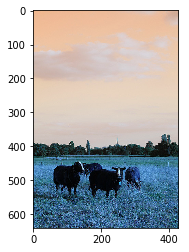

000000513417.jpg


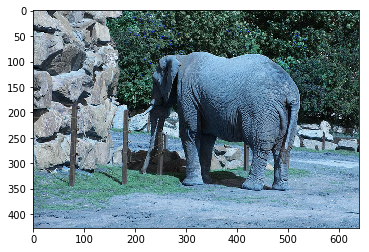

000000489861.jpg


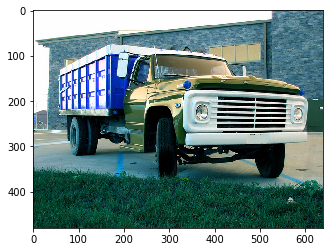

000000390518.jpg


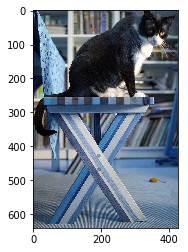

000000229654.jpg


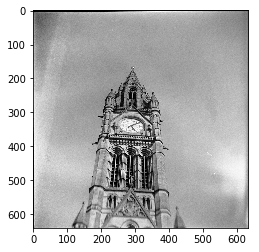

000000141709.jpg


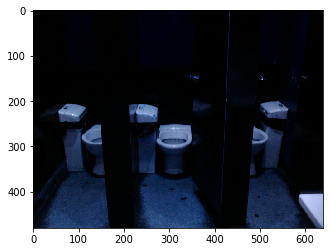

000000506196.jpg


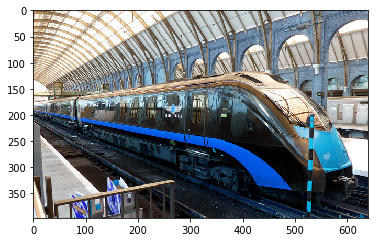

000000021175.jpg


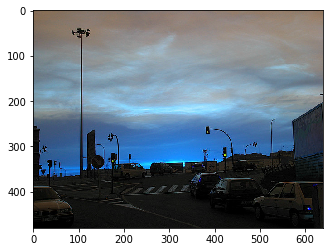

000000542186.jpg


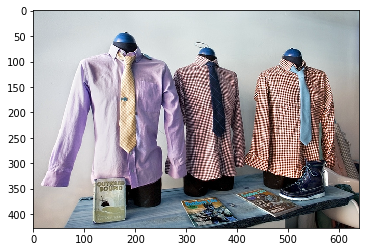

000000051268.jpg


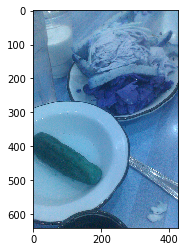

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

for file_name in neg_path_list[:10]:
    print(file_name)
    img = cv2.imread(f'train2017/{file_name}')
    img2 = img[:,:,::-1]
    plt.imshow(img)
    plt.show()